In [126]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 
import pingouin 
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare


In [2]:
# Calculating the sample mean
# The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

# You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In [3]:
path = 'late_shipments.feather'

late_shipments = feather.read_dataframe(path)

late_shipments

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13608.0,Uganda,PMO - US,Direct Drop,DDP,Air,0.0,No,ARV,Adult,...,121.0,9075.00,75.00,0.62,"Janssen-Cilag, Latina, IT",Yes,43.0,199.00,reasonable,12.72
996,80394.0,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,292.0,9344.00,32.00,1.60,"Trinity Biotech, Plc",Yes,99.0,2162.55,reasonable,13.10
997,61675.0,Zambia,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2127.0,170160.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,881.0,14019.38,expensive,210.49
998,39182.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,191011.0,861459.61,4.51,0.15,"Aurobindo Unit III, India",Yes,16234.0,14439.17,expensive,1421.41


In [4]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments.late == 'Yes').mean()

# Print the results
print(late_prop_samp)

0.061


In [5]:
# create 5000 bootstrap distributions

orig_late_delivery = late_shipments.late_delivery

len_sample = len(orig_late_delivery)
n_boostraps = 5000

late_shipments_boot_distn = []

for _ in range(n_boostraps):
    bootstrap_sample = np.random.choice(orig_late_delivery, size=len_sample, replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    late_shipments_boot_distn.append(bootstrap_mean)
    
late_shipments_boot_distn[:10]

[0.056, 0.065, 0.051, 0.059, 0.055, 0.062, 0.066, 0.071, 0.065, 0.058]

(array([  2.,   5.,   6.,   6.,   6.,  22.,  23.,  30.,  42.,  52.,  62.,
         78.,  89., 103., 127., 141., 176., 204., 244., 230., 241., 244.,
        264., 262., 254., 274., 232., 210., 210.,   0., 202., 163., 144.,
        126., 105.,  88.,  71.,  55.,  51.,  45.,  34.,  15.,  23.,   8.,
          8.,   6.,   1.,   7.,   1.,   3.,   1.,   0.,   2.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.]),
 array([0.038     , 0.03896667, 0.03993333, 0.0409    , 0.04186667,
        0.04283333, 0.0438    , 0.04476667, 0.04573333, 0.0467    ,
        0.04766667, 0.04863333, 0.0496    , 0.05056667, 0.05153333,
        0.0525    , 0.05346667, 0.05443333, 0.0554    , 0.05636667,
        0.05733333, 0.0583    , 0.05926667, 0.06023333, 0.0612    ,
        0.06216667, 0.06313333, 0.0641    , 0.06506667, 0.06603333,
        0.067     , 0.06796667, 0.06893333, 0.0699    , 0.07086667,
        0.07183333, 0.0728    , 0.07376667, 0.07473333, 0.0757    ,
        0.07666667, 0.07763333, 0.0786    , 0.

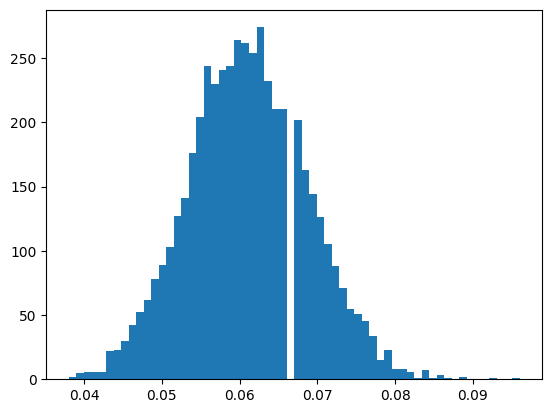

In [6]:
plt.hist(late_shipments_boot_distn, bins=60)

In [7]:
# Calculating a z-score
# Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

# One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

In [8]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1) # being a standard deviation calculation over a sample, degrees of freedom=1 (we divide by n-1)

std_error

0.00762837639247547

In [9]:
# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.13108949382549973


In [10]:
# Calculating p-values
# In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

# You'll now return to the late shipments dataset and the proportion of late shipments.

# The null hypothesis, 
# , is that the proportion of late shipments is six percent.

# The alternative hypothesis, 
# , is that the proportion of late shipments is greater than six percent.

In [11]:
# Calculate the p-value

p_value = 1 - norm.cdf(z_score) # 1 - CDF , because it's a right tailed test

p_value

0.4478522560771028

In [12]:
# If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

In [13]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
# When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter (0.6) is within the confidence interval, you should fail to reject the null hypothesis.

print((lower, upper))

(0.046, 0.076)


In [14]:
# Two sample mean test statistic

# The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

# While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

In [15]:
# The sample means for the two groups are available as xbar_no and xbar_yes

xbar_yes = late_shipments[late_shipments.late == 'Yes']['weight_kilograms'].mean()
xbar_no = late_shipments[late_shipments.late == 'No']['weight_kilograms'].mean()

xbar_yes, xbar_no

(2715.6721311475408, 1897.7912673056444)

In [16]:
# The sample standard deviations are s_no and s_yes

s_yes = late_shipments[late_shipments.late == 'Yes']['weight_kilograms'].std()
s_no = late_shipments[late_shipments.late == 'No']['weight_kilograms'].std()

s_yes, s_no

(2544.688210903328, 3154.0395070841696)

In [17]:
# The sample sizes are n_no and n_yes

In [18]:
n_yes = late_shipments[late_shipments.late == 'Yes'].shape[0]
n_no = late_shipments[late_shipments.late == 'No'].shape[0]

n_yes, n_no

(61, 939)

In [19]:
# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)

2.3936661778766433


In [20]:
# Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

# Recall the hypotheses:

# H0: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

# HA: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

# The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.


In [21]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

degrees_of_freedom

998

In [22]:
from scipy.stats import t

t_stat = - t_stat # just to try another value for the test statistic

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df = degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


In [23]:
# Visualizing the difference
# Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

# Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

# dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

In [24]:
path = 'dem_votes_potus_12_16.feather'

sample_dem_data = feather.read_dataframe(path)

sample_dem_data

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546
...,...,...,...,...
495,Wyoming,Uinta,19.065464,14.191263
496,Wyoming,Washakie,20.131846,13.948610
497,Alaska,District 3,33.514582,16.301064
498,Alaska,District 18,61.284271,52.810051


In [25]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

sample_dem_data['diff']

0       1.358979
1       3.606319
2       7.999155
3       4.633500
4       5.895185
         ...    
495     4.874201
496     6.183235
497    17.213518
498     8.474220
499     3.508694
Name: diff, Length: 500, dtype: float64

In [26]:
# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

xbar_diff

6.829312660106834

In [27]:
# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

s_diff

5.040139140132317

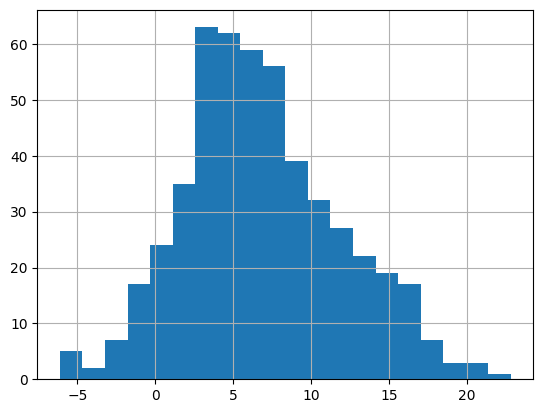

In [28]:
# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

In [29]:
# Using ttest()
# Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

# As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

# : The proportion of democratic votes in 2012 and 2016 were the same. 
# : The proportion of democratic votes in 2012 and 2016 were different.

In [32]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")


                              
# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [33]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=True,
                                     alternative="two-sided")

                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [34]:
# Conduct a un-paired t-test on dem_percent_12 and dem_percent_16
unpaired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=False,
                                     alternative="two-sided")

                              
# Print the paired test results
print(unpaired_test_results)

               T  dof alternative         p-val        CI95%   cohen-d  \
T-test  7.181565  998   two-sided  1.345737e-12  [4.96, 8.7]  0.454202   

             BF10  power  
T-test  4.308e+09    1.0  


In [ ]:
# Visualizing many categories
# So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

# Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".


In [35]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

xbar_pack_by_mode

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64

In [36]:
# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

s_pack_by_mode

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64

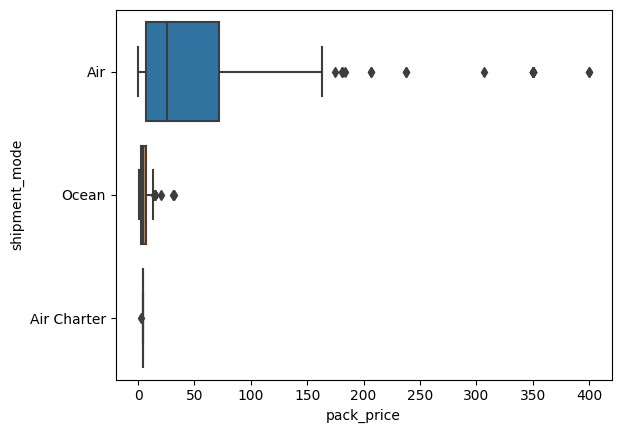

In [40]:
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price', y="shipment_mode", data=late_shipments)
plt.show()

In [ ]:
# Conducting an ANOVA test

# The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

# H0: Pack prices for every category of shipment mode are the same.

# Ha: Pack prices for some categories of shipment mode are different.

# Use a significance level of 0.1.

In [41]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,dv='pack_price', between='shipment_mode')

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


In [ ]:
# Pairwise t-tests

# The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

In [42]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="none")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [43]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


In [ ]:
# Test for single proportions
# In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.


In [44]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

p_hat

0.061

In [45]:
# Calculate the sample size
n = len(late_shipments)

n

1000

In [46]:
# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

z_score

0.13315591032282698

In [47]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


In [ ]:
# Test of two proportions

# You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

# The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

# H0: late_expensive - late_reasonable = 0

# HA: late_expensive - late_reasonable > 0

# p_hats contains the estimates of population proportions (sample proportions) for each freight_cost_group:

# freight_cost_group  late
# expensive           Yes     0.082569
# reasonable          Yes     0.035165
# Name: late, dtype: float64
# ns contains the sample sizes for these groups:

# freight_cost_group
# expensive     545
# reasonable    455
# Name: late, dtype: int64

In [50]:
pd.set_option('display.max_columns', None)

late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60.0,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60.0,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",Generic,N/A,Test kit - Ancillary,100.0,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [53]:
ns = late_shipments.groupby("freight_cost_groups")['late'].count()

ns

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64

In [52]:
p_hats = late_shipments.groupby("freight_cost_groups")['late'].value_counts(normalize=True)

p_hats

freight_cost_groups  late
expensive            No      0.920904
                     Yes     0.079096
reasonable           No      0.964835
                     Yes     0.035165
Name: proportion, dtype: float64

In [54]:
ns['expensive']

531

In [55]:
p_hats['expensive']

late
No     0.920904
Yes    0.079096
Name: proportion, dtype: float64

In [56]:
p_hats['expensive','Yes']

0.07909604519774012

In [57]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable", 'Yes'] * ns["reasonable"] + p_hats["expensive", 'Yes'] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

p_hat

0.058823529411764705

In [58]:
# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

std_error

0.015031300895066685

In [61]:
# Calculate the z-score
z_score = (p_hats["expensive", 'Yes'] - p_hats["reasonable", 'Yes']) / std_error

z_score

2.922648567784529

In [62]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

0.0017353400023595311


In [ ]:
# proportions_ztest() for two samples
# That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the statsmodels package.

In [64]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

late_by_freight_cost_group

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: count, dtype: int64

In [67]:
# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([42 + 489, 16 + 439])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,
                                  alternative="larger")

# Print the results
print(stat, p_value)

2.922648567784529 0.001735340002359578


In [ ]:
# Performing a chi-square test

# The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

# Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

# The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

# EXW: "Ex works". The buyer pays for transportation of the goods.
# CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
# DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
# FCA: "Free carrier". The seller pays for transportation of the goods.
# Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

# H0: vendor_inco_term and freight_cost_group are independent.

# HA: vendor_inco_term and freight_cost_group are associated.

In [79]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props_norm = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

props_norm

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: proportion, dtype: float64

In [80]:
# Convert props to wide format
wide_props_norm = props_norm.unstack()

wide_props_norm

freight_cost_groups,expensive,reasonable
vendor_inco_term,,
CIP,0.320000,0.680000
DDP,0.550000,0.450000
DDU,NaN,1.000000
EXW,0.583448,0.416552
FCA,0.336364,0.663636


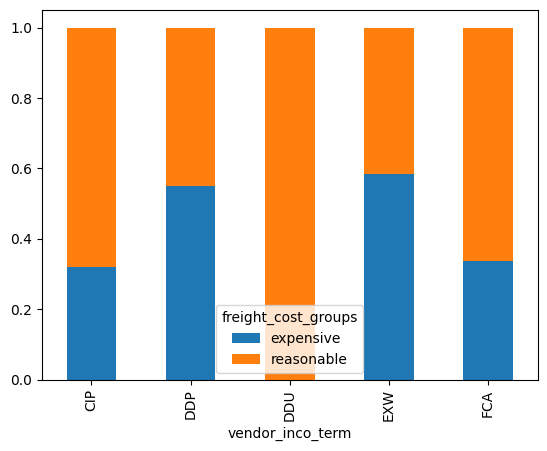

In [81]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props_norm.plot(kind="bar", stacked=True)
plt.show()


In [82]:
# Proportion of freight_cost_group grouped by vendor_inco_term, not normalized
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=False)

props

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: count, dtype: int64

In [83]:
# Convert props to wide format
wide_props = props.unstack()

wide_props

freight_cost_groups,expensive,reasonable
vendor_inco_term,,
CIP,16.0,34.0
DDP,55.0,45.0
DDU,NaN,1.0
EXW,423.0,302.0
FCA,37.0,73.0


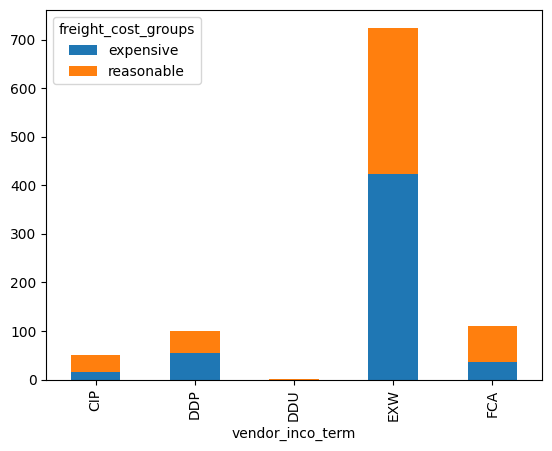

In [84]:
# Proportional not normalized stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()


In [73]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x="vendor_inco_term", y="freight_cost_groups")


C:\Users\Alienware\miniconda3\envs\py309\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\Alienware\miniconda3\envs\py309\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\Alienware\miniconda3\envs\py309\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\Alienware\miniconda3\envs\py309\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\Alienware\miniconda3\envs\py309\lib\site-packages\scipy\stats\stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


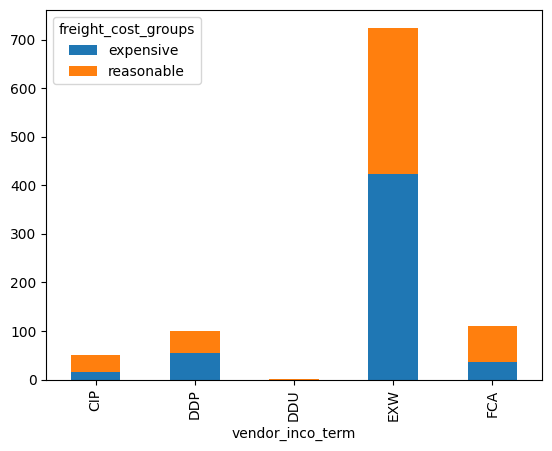

freight_cost_groups,expensive,reasonable
vendor_inco_term,,
CIP,16,34
DDP,55,45
DDU,0,1
EXW,423,302
FCA,37,73


In [76]:
observed.plot(kind="bar", stacked=True) # same as proportional not normalized stack bar above
plt.show()
observed

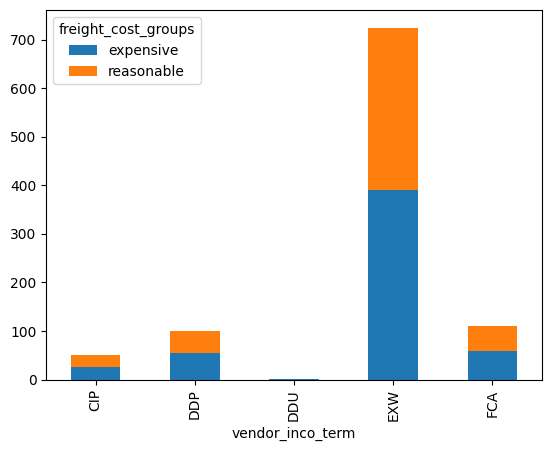

freight_cost_groups,expensive,reasonable
vendor_inco_term,,
CIP,26.926978,23.073022
DDP,53.853955,46.146045
DDU,0.538540,0.461460
EXW,390.441176,334.558824
FCA,59.239351,50.760649


In [75]:
expected.plot(kind="bar", stacked=True)
plt.show()
expected

In [77]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,34.805072,4.0,5.093922e-07,0.186561,0.999235
1,cressie-read,0.666667,34.845134,4.0,4.998337e-07,0.186669,0.999244
2,log-likelihood,0.000000,35.442911,4.0,3.767119e-07,0.188263,0.999361
3,freeman-tukey,-0.500000,NaN,4.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,4.0,0.000000e+00,inf,1.000000
5,neyman,-2.000000,NaN,4.0,NaN,NaN,NaN


In [78]:
# Print results
print(stats[stats['test'] == 'pearson']) 

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


In [ ]:
# Visualizing goodness of fit
# The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

# Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

# CIP: 0.05
# DDP: 0.1
# EXW: 0.75
# FCA: 0.1

In [113]:
import pandas as pd

# Define the data
data = {
    'vendor_inco_term': ['EXW', 'FCA','DDP','CIP'],
    'prop': [0.75, 0.10, 0.10, 0.05]
}

# Create the DataFrame
hypothesized = pd.DataFrame(data)

print(hypothesized)


  vendor_inco_term  prop
0              EXW  0.75
1              FCA  0.10
2              DDP  0.10
3              CIP  0.05


In [130]:
# Find the number of rows in late_shipments
n_total = len(late_shipments) - 1

n_total

999

In [131]:
# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

hypothesized

,vendor_inco_term,prop,n
0,EXW,0.75,749.25
1,FCA,0.10,99.90
2,DDP,0.10,99.90
3,CIP,0.05,49.95


In [132]:
incoterm_counts = pd.DataFrame(late_shipments[late_shipments['vendor_inco_term']!='DDU']['vendor_inco_term'].value_counts())
incoterm_counts = incoterm_counts.reset_index()
incoterm_counts

,vendor_inco_term,count
0,EXW,732
1,FCA,111
2,DDP,100
3,CIP,56


<BarContainer object of 4 artists>

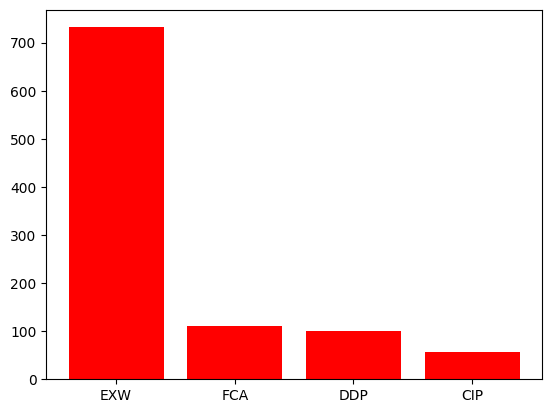

In [133]:
# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['count'], color="red", label="Observed")


<BarContainer object of 4 artists>

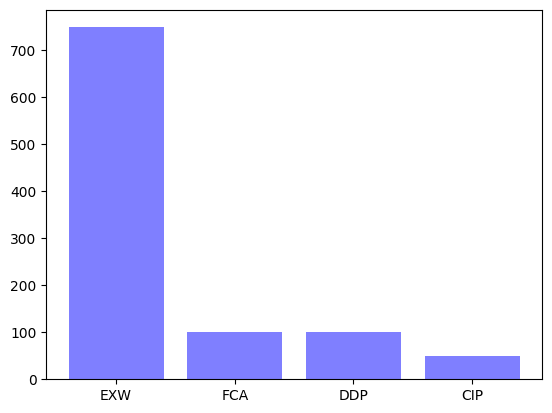

In [134]:
# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized["vendor_inco_term"], hypothesized["n"], alpha=0.5, color="blue", label="Hypothesized")


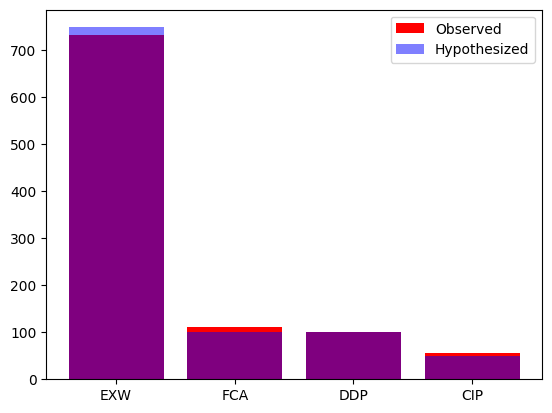

In [135]:
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['count'], color="red", label="Observed")
plt.bar(hypothesized["vendor_inco_term"], hypothesized["n"], alpha=0.5, color="blue", label="Hypothesized")
plt.legend()
plt.show()

In [ ]:
# Performing a goodness of fit test

# The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

# Recall the hypotheses for this type of test:

# H0: The sample matches with the hypothesized distribution.

# HA: The sample does not match with the hypothesized distribution.

# To decide which hypothesis to choose, we'll set a significance level of 0.1.

In [136]:
incoterm_counts['count']

0    732
1    111
2    100
3     56
Name: count, dtype: int64

In [137]:
hypothesized['n']

0    749.25
1     99.90
2     99.90
3     49.95
Name: n, dtype: float64

In [138]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['count'], f_exp=hypothesized['n'])

# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)


In [ ]:
# Testing sample size

# In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.

# The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the late_shipments dataset.

In [143]:
# Count the freight_cost_group values (for two sample test)
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

freight_cost_groups
expensive     531
reasonable    455
Name: count, dtype: int64
True


In [144]:
# Count the late values (for one sample proportion test)
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

late
No     939
Yes     61
Name: count, dtype: int64
True


In [146]:
# Count the values of freight_cost_group grouped by vendor_inco_term (for chi-square test)
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())


vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: count, dtype: int64
False


In [147]:
# Count the shipment_mode values (for ANOVA test)
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

shipment_mode
Air            906
Ocean           88
Air Charter      6
Name: count, dtype: int64
False


In [ ]:
# You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

In [149]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=True,
                                     alternative="two-sided")

# Print paired t-test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [150]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'], 
                                          y=sample_dem_data['dem_percent_16'],
                                          alternative="two-sided")

# Print Wilcoxon test results
 # Given the large sample size (500), you obtained similar results here between the parametric t-test and non-parametric Wilcoxon test with a very small p-value.
print(wilcoxon_test_results)

           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


In [ ]:
# Wilcoxon-Mann-Whitney
# Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

# By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

# One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

In [151]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[["weight_kilograms", "late"]]

weight_vs_late

,weight_kilograms,late
0,1426.0,Yes
1,10.0,No
2,3723.0,No
3,7698.0,No
4,56.0,No
...,...,...
995,43.0,No
996,99.0,No
997,881.0,Yes
998,16234.0,No


In [152]:
# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')

weight_vs_late_wide

late,No,Yes
0,NaN,1426.0
1,10.0,NaN
2,3723.0,NaN
3,7698.0,NaN
4,56.0,NaN
...,...,...
995,43.0,NaN
996,99.0,NaN
997,NaN,881.0
998,16234.0,NaN


In [153]:
# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],
                        y=weight_vs_late_wide['Yes'],
                        alternative='two-sided')

# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


In [ ]:
# Kruskal-Wallis
# Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

In [154]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data = late_shipments, dv = 'weight_kilograms', between = 'vendor_inco_term')

# Print the results
print(kw_test)

                   Source  ddof1          H         p-unc
Kruskal  vendor_inco_term      4  144.33604  3.327732e-30
